In [3]:
# import stuff as per

import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# params
nx = 50
ny = 50
nt = 10000

xmin = 0
xmax = 2

ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# initialise things
p  = numpy.zeros((ny, nx))
pn = numpy.zeros((ny, nx))
b  = numpy.zeros((ny, nx))
x  = numpy.linspace(xmin, xmax, nx)
y  = numpy.linspace(xmin, xmax, ny)

# forcing function
b[int(ny / 4), int(nx / 4)] = 100
b[int(ny * 3 / 4), int(nx * 3 / 4)] = -100

In [5]:
# solver
for n in range(nt + 1):
    
    pn = p.copy()
    
    p[1:-1, 1:-1] = ((dy ** 2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                      dx ** 2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) +
                      - b[1:-1, 1:-1] * dx ** 2 * dy ** 2) /
                     (2 * (dx ** 2 + dy ** 2)))
    
    # boundary conditions
    
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

In [6]:
# create a standardised 3D plotter

def plot3D(x, y, u):
    
    figure = pyplot.figure()
    axes = figure.gca(projection = "3d")
    X, Y = numpy.meshgrid(x, y)
    
    surface = axes.plot_surface(X, Y, u, cmap = cm.viridis, antialiased = False)
    
    axes.set_ylabel("$y$")
    axes.set_xlabel("$x$")

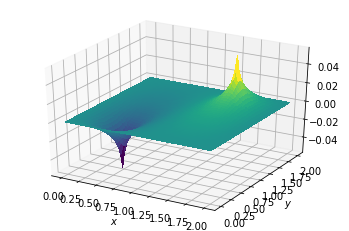

In [7]:
plot3D(x, y, p)